In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import math
import folium

In [3]:
pd.options.display.float_format = '{:.6f}'.format
mta = pd.read_csv('./cleaned/cleaned_turnstile_200425.csv', parse_dates=['DATE'])
mta.set_index(['DATE'], inplace=True)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(mta.loc[mta.index.unique()[0], :])
    display(mta.loc[mta.index.unique()[0], :].describe())

,STATION,LATITUDE,LONGITUDE,ENTRIES_DIFF,EXITS_DIFF
DATE,,,,,
2020-04-18,1 AVE,40.730901,-73.981719,1014,2378
2020-04-18,103 ST,40.790582,-73.947473,1070,1544
2020-04-18,103 ST,40.796105,-73.961399,199,238
2020-04-18,103 ST,40.799354,-73.968329,602,701
2020-04-18,103 ST-CORONA,40.749858,-73.862672,1646,1458
2020-04-18,104 ST,40.695184,-73.844326,184,94
2020-04-18,110 ST,40.795066,-73.944297,1618,2336
2020-04-18,110 ST-CATHEDRL,40.804032,-73.966742,1190,1454
2020-04-18,110 ST-CPN,40.799110,-73.951807,487,847


,LATITUDE,LONGITUDE,ENTRIES_DIFF,EXITS_DIFF
count,457.000000,457.000000,457.000000,457.000000
mean,40.729027,-73.935834,951.923414,1179.061269
std,0.078028,0.057646,1540.978369,2091.074798
min,40.576152,-74.074824,2.000000,0.000000
25%,40.675496,-73.981912,272.000000,283.000000
50%,40.718542,-73.948975,496.000000,566.000000
75%,40.779485,-73.899558,1028.000000,1272.000000
max,40.903085,-73.755383,20358.000000,28668.000000


In [97]:
map = folium.Map(location=[40.74, -73.93], zoom_start=10.2)
for index, row in mta.loc['2020-04-18', :].iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']], radius=math.log(row['ENTRIES_DIFF']),
                        tooltip=row['STATION']+'\n'+str(row['ENTRIES_DIFF']), fill=True).add_to(map)
map

In [93]:
map.save('map.html')

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


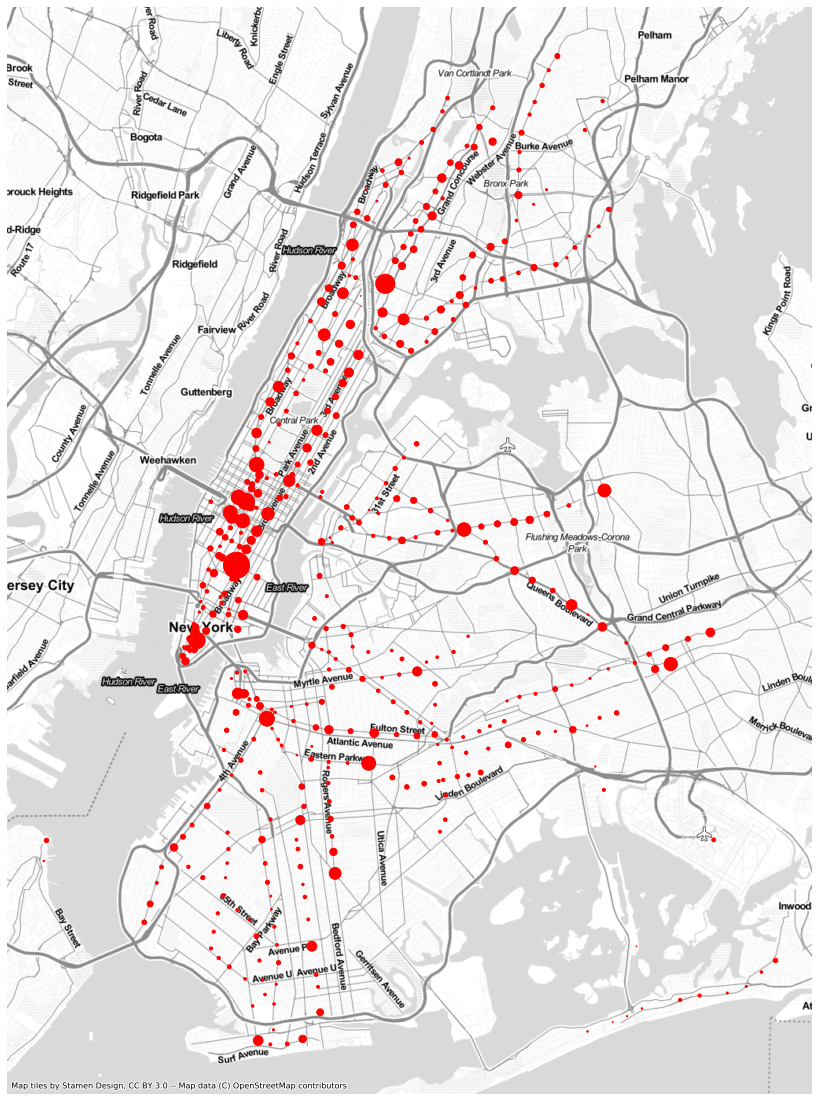

In [32]:
daily_mta = mta.loc[mta.index.unique()[0], :]
geo_mta = gpd.GeoDataFrame(daily_mta, geometry=gpd.points_from_xy(daily_mta['LONGITUDE'], daily_mta['LATITUDE']))
geo_mta.crs = 'epsg:4326'
geo_mta = geo_mta.to_crs(epsg=3857)
ax = geo_mta.plot(figsize=(20, 20), color='red', markersize=geo_mta['ENTRIES_DIFF']/30)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, zoom='auto', crs=geo_mta.crs)
ax.set_axis_off()